# Ismael Hasan
## Assignment 5

**IS 362 - Dr. Charles Pak - CUNY School of Professional Studies**

The chart above describes arrival delays for two airlines across five destinations. <br>

**Your task in this week’s assignment is to answer three questions:**
> 1. What is the northernmost airport in the United States?
> 2. What is the easternmost airport in the United States?
> 3. On February 12th, 2013, which New York area airport had the windiest weather?

**Raw Source Data:**
> - https://github.com/hadley/nycflights13/tree/master/data-raw


In [10]:
import numpy as np
import pandas as pd

***Read and display raw aiport and weather datasets (top 5)***

In [11]:
airports = pd.read_csv('https://raw.githubusercontent.com/hadley/nycflights13/master/data-raw/airports.csv')
airports.head(5)

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York


In [12]:
weather = pd.read_csv('https://raw.githubusercontent.com/hadley/nycflights13/master/data-raw/weather.csv')
weather.head(5)

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z


## Question #1
***What is the northernmost airport in the United States?***


In [13]:
airports.sort_values(by = 'lat', ascending = False).head(5)

,faa,name,lat,lon,alt,tz,dst,tzone
417,EEN,Dillant Hopkins Airport,72.270833,42.898333,149,-5,A,NaN
230,BRW,Wiley Post Will Rogers Mem,71.285446,-156.766003,44,-9,A,America/Anchorage
110,AIN,Wainwright Airport,70.638056,-159.994722,41,-9,A,America/Anchorage
708,K03,Wainwright As,70.613378,-159.860350,35,-9,A,America/Anchorage
152,ATK,Atqasuk Edward Burnell Sr Memorial Airport,70.467300,-157.436000,96,-9,A,America/Anchorage


*When sorting the airports dataset by latitutde, Dillant Hopkins Aiport (New Hampshire) appears to be the northernmost aiport within the United States. After a quick search on google, we can see the correct coordinates for this airport are 42.9065° N, 72.2726° W, which shows the data for latititude and longitude data were swapped.* 

***The actual norethernmost airport within the United states is Wiley Post Will Rogers Memorial Airport (Alaska).***

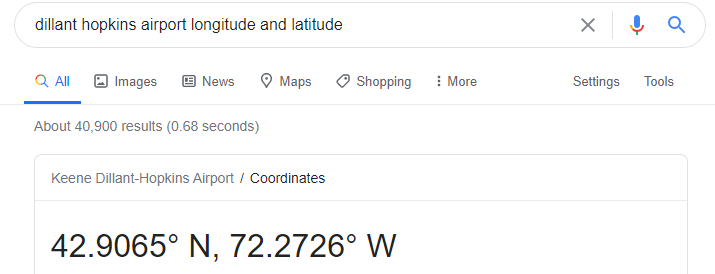

## Question #2
***What is the easternmost airport in the United States?***


In [14]:
airports.sort_values(by = 'lon', ascending = False).head(5) 

,faa,name,lat,lon,alt,tz,dst,tzone
1290,SYA,Eareckson As,52.712275,174.113620,98,-9,A,America/Anchorage
942,MYF,Montgomery Field,32.475900,117.759000,17,8,A,Asia/Chongqing
396,DVT,Deer Valley Municipal Airport,33.411700,112.457000,1478,8,A,Asia/Chongqing
417,EEN,Dillant Hopkins Airport,72.270833,42.898333,149,-5,A,NaN
444,EPM,Eastport Municipal Airport,44.910111,-67.012694,45,-5,A,America/New_York


*When sorting the airports by longitude, Eareckson As Airport appears to be the easternmost airport within the United States. However, when we reference its 'tzone' column, we can see that airport is located in Alaska, which is on the west coast, so this must be incorrect. If we check the other airports on this list we can confirm they are all on the west coast except for Dillant Hopkins Airport and Eastport Municipal Airport. From the previous question we identified Dillant Hopkins Airport location(New Hampshire).* 

***The actual easternmost airport within the United States is Eastport Municipal Airport (Maine).***

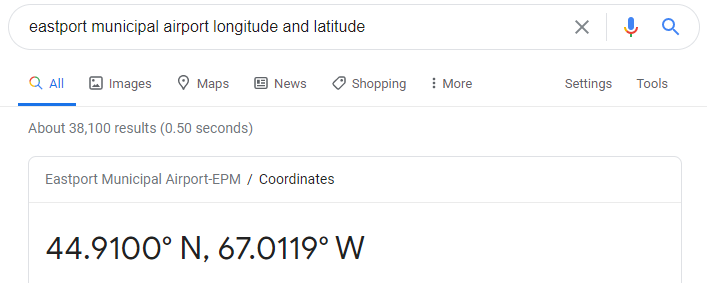

## Question #3
***On February 12th, 2013, which New York area airport had the windiest weather?***


In [15]:
weather[(weather['year'] == 2013)
        & (weather['month'] == 2)
        & (weather['day'] == 12)].sort_values(by = ['wind_speed'], ascending=False).head(5) 

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
1009,EWR,2013,2,12,3,39.02,26.96,61.63,260.0,1048.36058,NaN,0.0,1008.3,10.0,2013-02-12T08:00:00Z
18417,LGA,2013,2,12,2,42.98,26.06,50.94,290.0,23.01560,31.07106,0.0,1007.1,10.0,2013-02-12T07:00:00Z
1018,EWR,2013,2,12,12,44.06,26.06,48.87,270.0,21.86482,31.07106,0.0,1012.5,10.0,2013-02-12T17:00:00Z
18428,LGA,2013,2,12,13,44.06,23.00,43.02,300.0,21.86482,25.31716,0.0,1011.7,10.0,2013-02-12T18:00:00Z
18429,LGA,2013,2,12,14,44.06,23.00,43.02,300.0,20.71404,25.31716,0.0,1011.5,10.0,2013-02-12T19:00:00Z


*When sorting the weather by wind speed, EWR or Newark Airport appears to be the windiest New York area airport. However, this number is extremely high (1048.36) and was recorded only once at 8am. When referencing the other wind speed recorded at EWR later in the day (5pm), we see the speed drop to 21.86. So the first reading may be an error.*

***The actual windiest New York area airport is LGA or LaGuardia Airport.***
